In [16]:
# --------------------------------------------------------------
# Imports et configurations
# --------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# --------------------------------------------------------------
# Fonctions utilitaires
# --------------------------------------------------------------
def initial_eda(data):
    """Analyse exploratoire initiale des données"""
    if isinstance(data, pd.DataFrame):
        total_na = data.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print(
            "%38s %10s     %10s %10s"
            % ("Column Name", "Data Type", "#Distinct", "NA Values")
        )
        col_name = data.columns
        dtyp = data.dtypes
        uniq = data.nunique()
        na_val = data.isna().sum()
        for i in range(len(data.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Expect a DataFrame but got a %15s" % (type(data)))


def plot_pie_chart(data, column, title, figsize=(14, 8)):
    """Génère un diagramme circulaire pour une colonne donnée"""
    counts = data[column].value_counts()
    colors = sns.color_palette("pastel", n_colors=len(counts))

    plt.figure(figsize=figsize)
    wedges, texts= plt.pie(
        counts,
        labels=None,
        startangle=140,
        colors=colors,
        shadow=True,
        wedgeprops={"edgecolor": "black"},
    )
    plt.legend(counts.index, title="Labels", loc="best")
    plt.axis("equal")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()


def plot_bar_chart(data, column, title, xlabel, ylabel="Frequency", figsize=(10, 6)):
    """Génère un diagramme en barres pour une colonne donnée"""
    counts = data[column].value_counts()

    plt.figure(figsize=figsize)
    counts.plot(kind="bar", color="skyblue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


def plot_numeric_distribution_by_label(
    data, numeric_col, label_col, stat="mean", figsize=(12, 8)
):
    """Affiche la distribution d'une variable numérique par label"""
    if stat == "mean":
        stats = data.groupby(label_col)[numeric_col].mean().sort_values()
    else:
        stats = data.groupby(label_col)[numeric_col].median().sort_values()

    plt.figure(figsize=figsize)
    stats.plot(kind="barh", color="skyblue")
    plt.title(f"{stat.capitalize()} {numeric_col} by {label_col}")
    plt.xlabel(f"{stat.capitalize()} {numeric_col}")
    plt.ylabel(label_col)
    plt.tight_layout()
    plt.show()

In [18]:
# --------------------------------------------------------------
# Chargement des données
# --------------------------------------------------------------
def load_data(filepath):
    """Charge les données à partir d'un fichier parquet"""
    return pd.read_csv(filepath)

In [19]:
# Chargement des données
df = load_data('../data/external/iot23_combined.csv')

C:\Users\Infomedia\AppData\Local\Temp\ipykernel_14200\3789983403.py:6: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


In [20]:
del df['Unnamed: 0']

In [21]:
# 1. Analyse exploratoire initiale
print("\n=== Analyse exploratoire initiale ===")
initial_eda(df)
print("\nStatistiques descriptives:")


=== Analyse exploratoire initiale ===
Dimensions : 1444674 rows, 21 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                    ts    float64      1444674          0
                                   uid     object      1444674          0
                             id.orig_h     object         3266          0
                             id.orig_p    float64        62279          0
                             id.resp_h     object      1096073          0
                             id.resp_p    float64        29263          0
                                 proto     object            3          0
                               service     object            7          0
                              duration     object        58660          0
                            orig_bytes     object          296          0
                            resp_bytes     object          505          0
            

C:\Users\Infomedia\AppData\Local\Temp\ipykernel_14200\3194384603.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ts,1444674.0,1.543358e+09,1.113472e+07,1.525880e+09,1.532526e+09,1.545403e+09,1.551378e+09,1.569018e+09
id.orig_p,1444674.0,3.711644e+04,1.731163e+04,0.000000e+00,2.415900e+04,3.811400e+04,5.067300e+04,6.553500e+04
id.resp_p,1444674.0,1.759793e+04,2.242632e+04,0.000000e+00,2.300000e+01,2.323000e+03,3.721500e+04,6.553500e+04
missed_bytes,1444674.0,1.989258e-01,4.241975e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.027200e+04
orig_pkts,1444674.0,1.780510e+02,7.230421e+04,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.602735e+07
orig_ip_bytes,1444674.0,7.745525e+03,2.849409e+06,0.000000e+00,4.000000e+01,4.000000e+01,8.000000e+01,1.914793e+09
resp_pkts,1444674.0,1.257785e-01,1.547444e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.307000e+03
resp_ip_bytes,1444674.0,2.846040e+01,1.014930e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.207699e+07


In [23]:
# 2. Distribution des variables catégorielles
print("\n=== Distribution des variables ===")
for col in df.columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 50)


=== Distribution des variables ===

Value counts for column: ts
ts
1.525880e+09    1
1.551384e+09    1
1.551384e+09    1
1.551384e+09    1
1.551384e+09    1
               ..
1.545404e+09    1
1.545404e+09    1
1.545404e+09    1
1.545404e+09    1
1.532526e+09    1
Name: count, Length: 1444674, dtype: int64
--------------------------------------------------

Value counts for column: uid
uid
CDe43c1PtgynajGI6     1
CGPzL82Fljnyd7AbJe    1
CgYVboYViwsySbVTf     1
Clt7D72x8G7MZ9CJ4     1
CDNqrsPvBe6SRbbz1     1
                     ..
Cqt8fRZkTjMNZq8qk     1
CQeBub454kHQ8Xc7wj    1
CG2gm04Y7hQaie1Lpd    1
CdawFB46jw5k9UTXt4    1
C4U1azYmDx32faVY7     1
Name: count, Length: 1444674, dtype: int64
--------------------------------------------------

Value counts for column: id.orig_h
id.orig_h
192.168.1.197      204393
192.168.1.198      199987
192.168.100.111    199935
192.168.1.195      123106
192.168.100.103    100647
                    ...  
103.5.159.28            1
69.108.2.131        


=== Visualisations ===


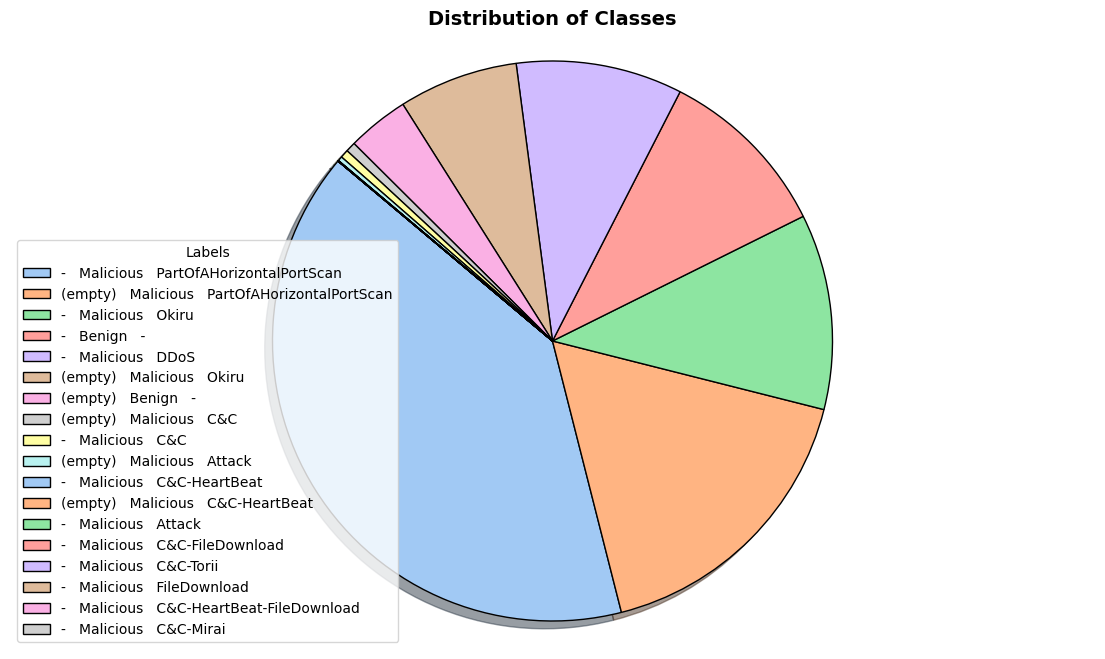

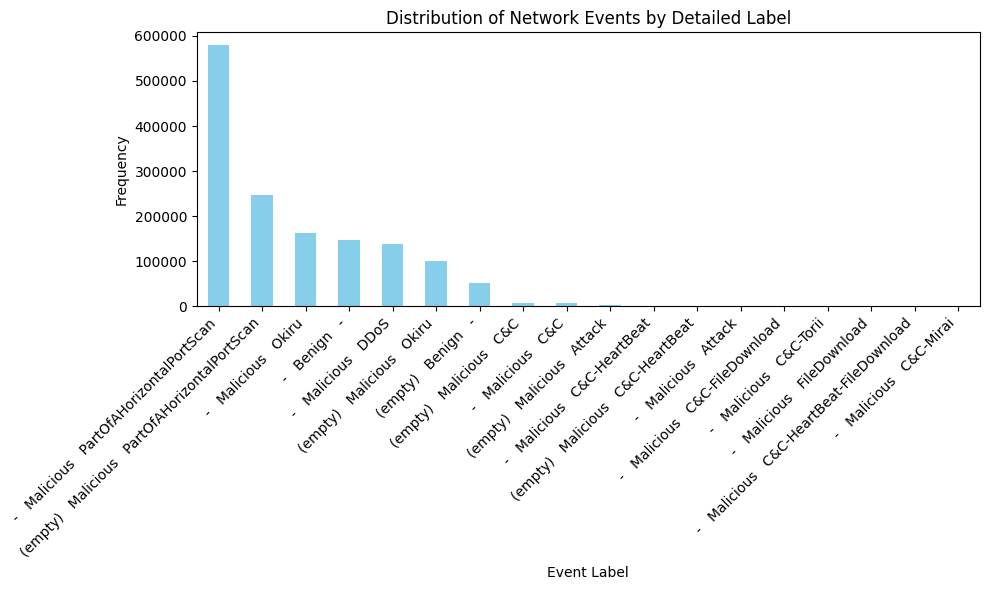

In [24]:
# 3. Visualisations
print("\n=== Visualisations ===")

# Distribution des attaques détaillées
plot_pie_chart(df, "detailed_label", "Distribution of Classes")
plot_bar_chart(
    df,
    "detailed_label",
    "Distribution of Network Events by Detailed Label",
    "Event Label",
)

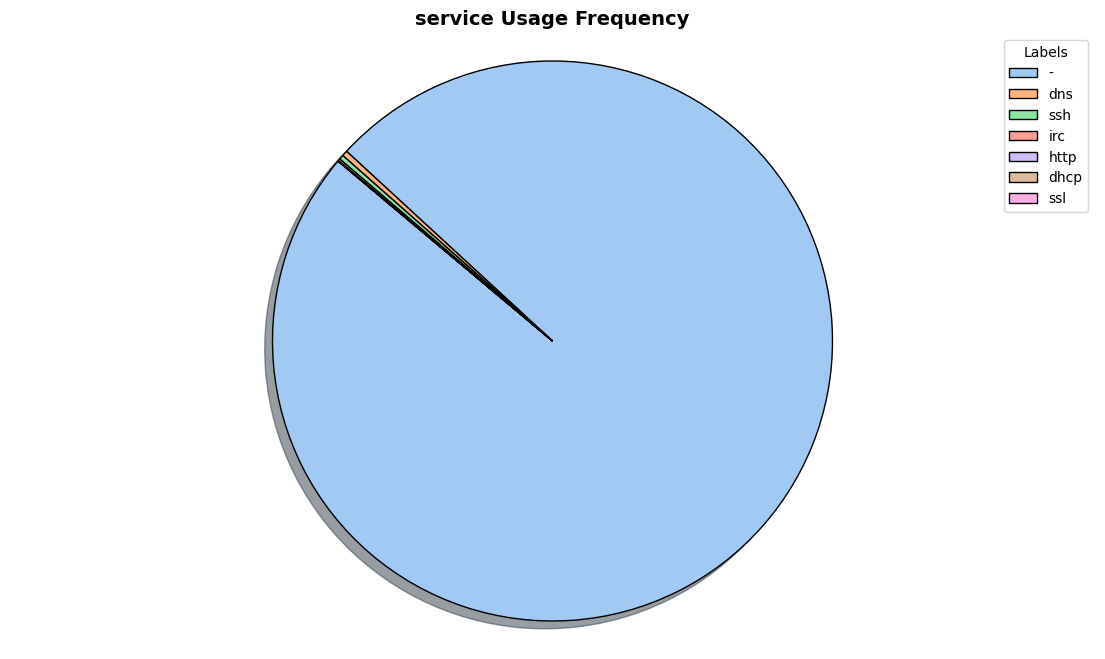

In [25]:
# Distribution des protocoles
plot_pie_chart(df, "service", "service Usage Frequency")

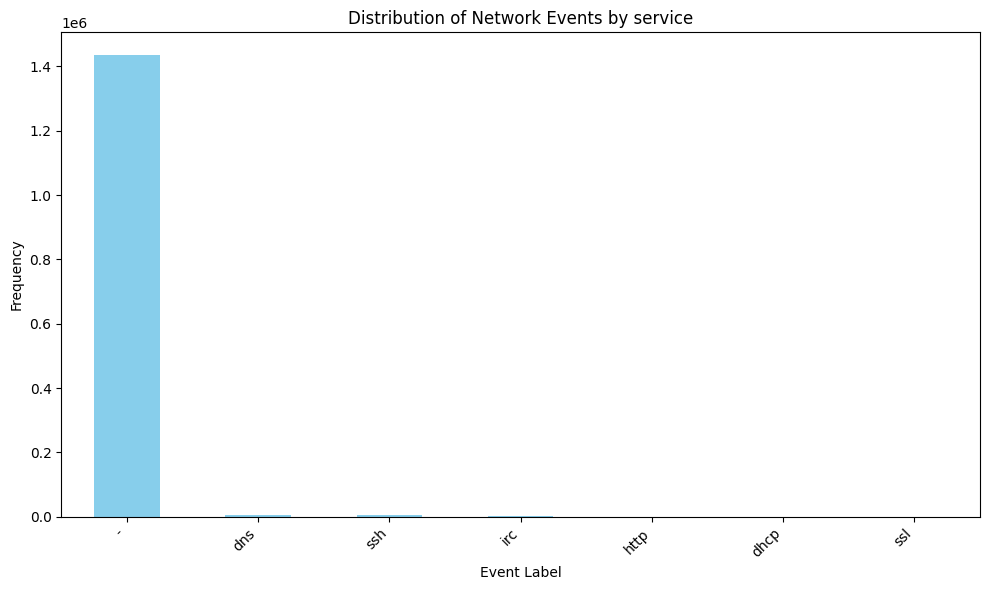

In [26]:
plot_bar_chart(
    df,
    "service",
    "Distribution of Network Events by service",
    "Event Label",
)

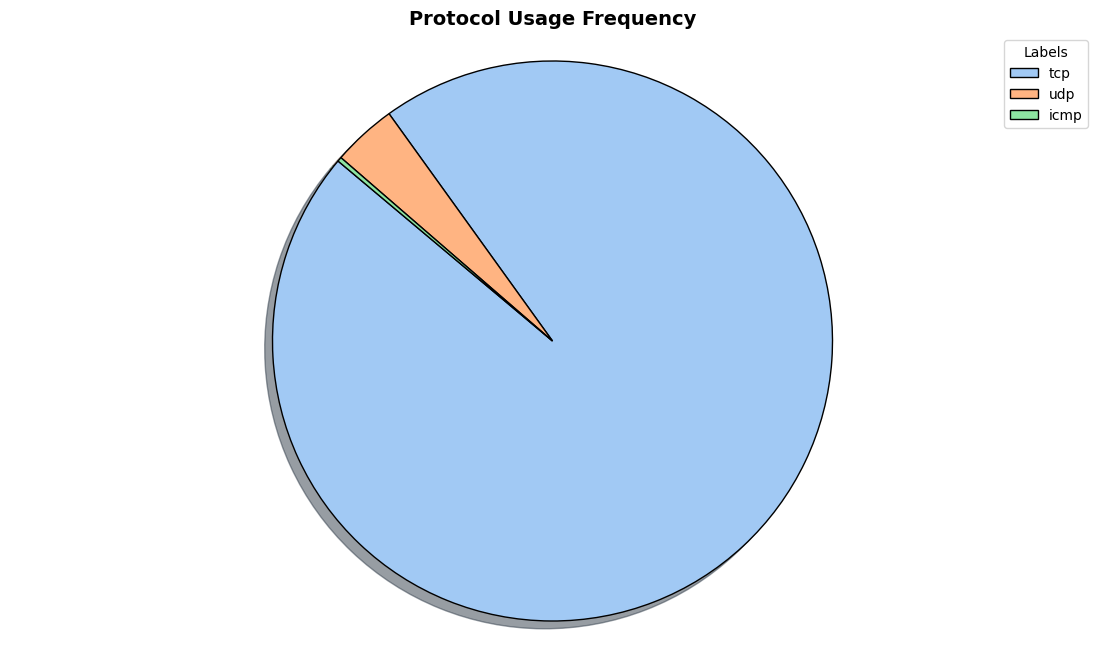

In [27]:
# Distribution des protocoles
plot_pie_chart(df, "proto", "Protocol Usage Frequency")

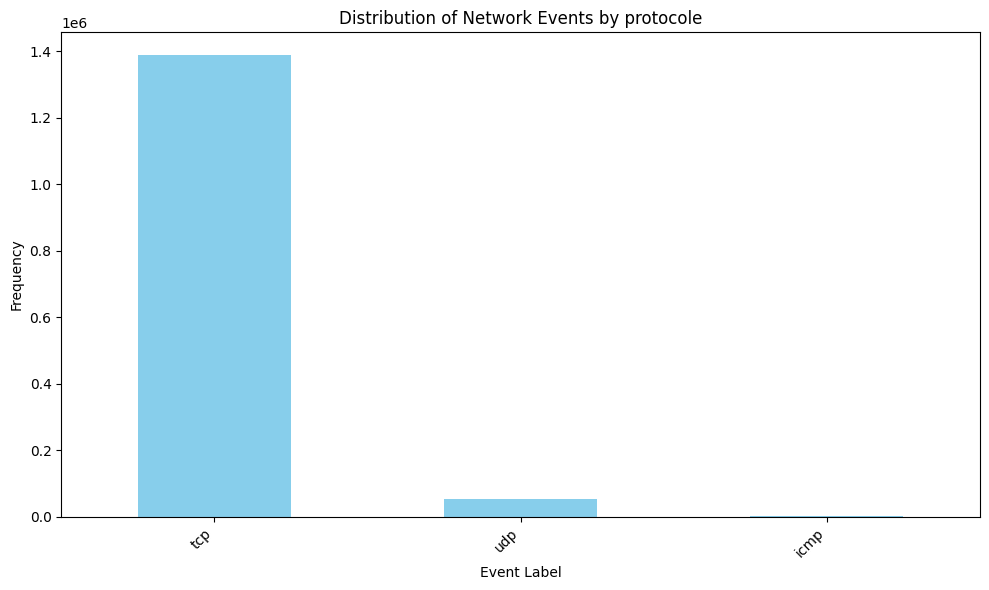

In [28]:
plot_bar_chart(
    df,
    "proto",
    "Distribution of Network Events by protocole",
    "Event Label",
)


Connection Duration by Label:
                                                    count          mean  \
detailed_label                                                            
(empty)   Benign   -                               8065.0      5.396619   
(empty)   Malicious   Attack                       3814.0      4.348445   
(empty)   Malicious   C&C                          2063.0     18.667861   
(empty)   Malicious   C&C-HeartBeat                 104.0      0.903085   
(empty)   Malicious   Okiru                         128.0      1.988935   
(empty)   Malicious   PartOfAHorizontalPortScan   66271.0      3.116337   
-   Benign   -                                    59731.0      3.396617   
-   Malicious   Attack                              101.0      3.958311   
-   Malicious   C&C                                4378.0     28.852091   
-   Malicious   C&C-FileDownload                     43.0      1.792746   
-   Malicious   C&C-HeartBeat                       167.0      1.8526

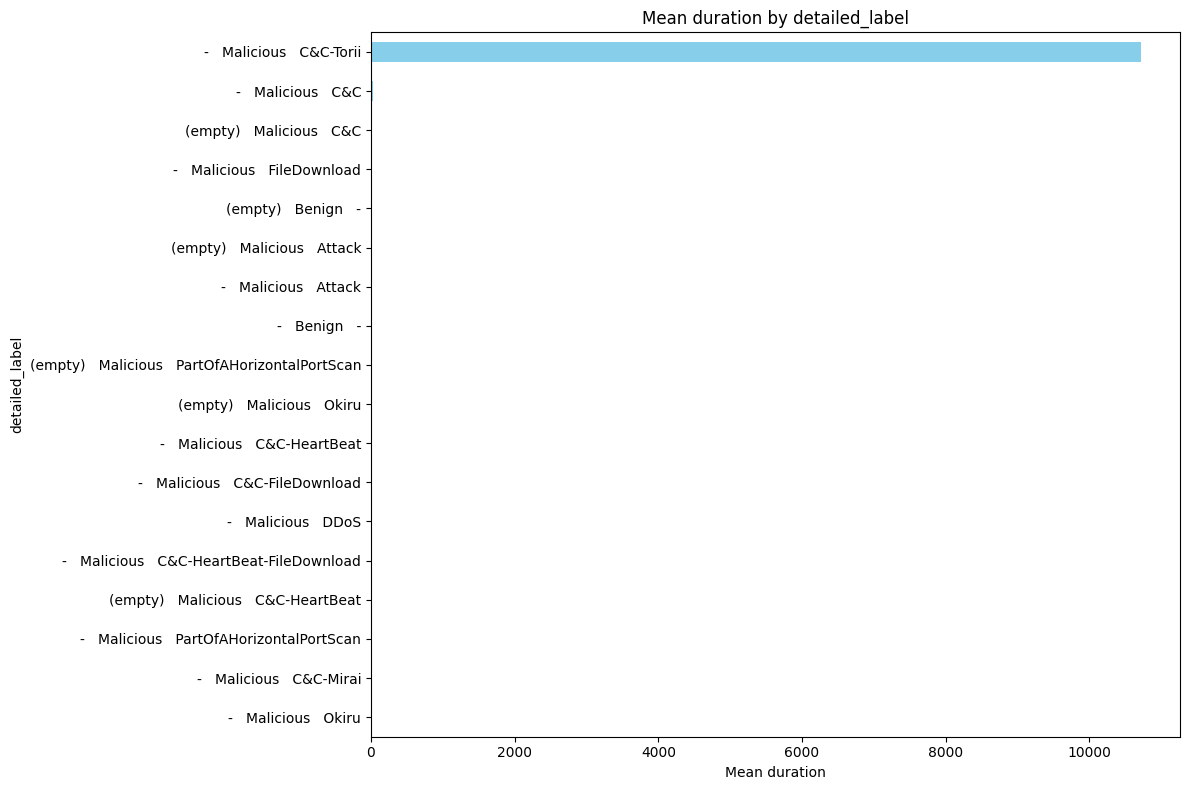

In [29]:
# Analyse de durée de connexion
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")
connection_duration_by_label = df.groupby("detailed_label")["duration"].describe()
print("\nConnection Duration by Label:")
print(connection_duration_by_label)
plot_numeric_distribution_by_label(df, "duration", "detailed_label", "mean")

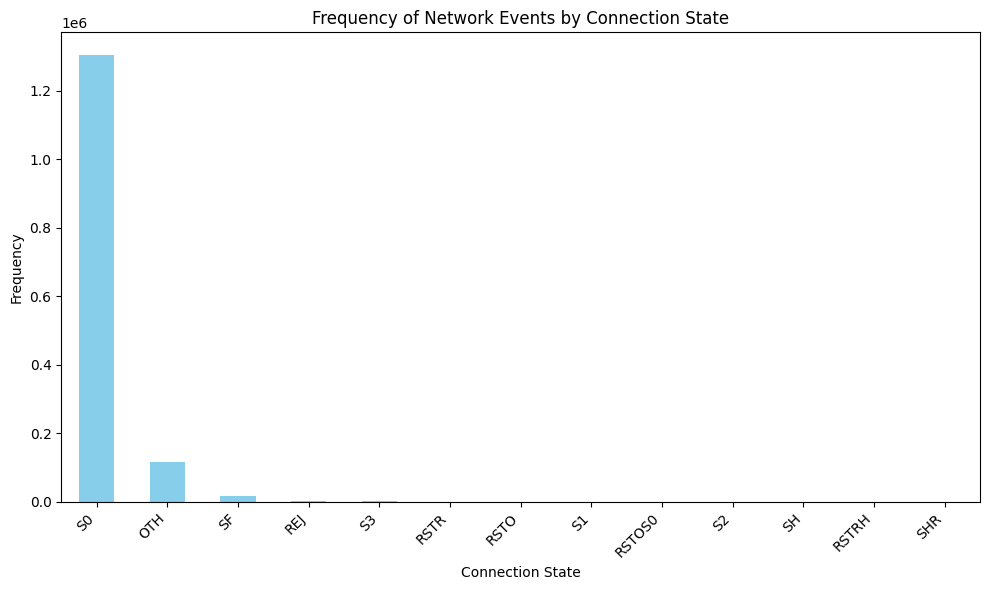

In [30]:
# États de connexion
plot_bar_chart(
    df,
    "conn_state",
    "Frequency of Network Events by Connection State",
    "Connection State",
)


=== Analyse de corrélation ===

Matrice de corrélation:
                     ts  id.orig_p  id.resp_p  duration  missed_bytes  \
ts             1.000000   0.153305   0.251242 -0.005524      0.001304   
id.orig_p      0.153305   1.000000  -0.356187  0.003082      0.002455   
id.resp_p      0.251242  -0.356187   1.000000 -0.002057     -0.003658   
duration      -0.005524   0.003082  -0.002057  1.000000      0.107365   
missed_bytes   0.001304   0.002455  -0.003658  0.107365      1.000000   
orig_pkts      0.005580   0.001512  -0.001414  0.095896      0.000022   
orig_ip_bytes  0.005291   0.001320  -0.001271  0.079720      0.000027   
resp_pkts     -0.006586   0.003126  -0.005960  0.738504      0.170280   
resp_ip_bytes -0.000557   0.001076  -0.002137  0.050434      0.110690   

               orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  
ts              0.005580       0.005291  -0.006586      -0.000557  
id.orig_p       0.001512       0.001320   0.003126       0.001076  
id.resp_

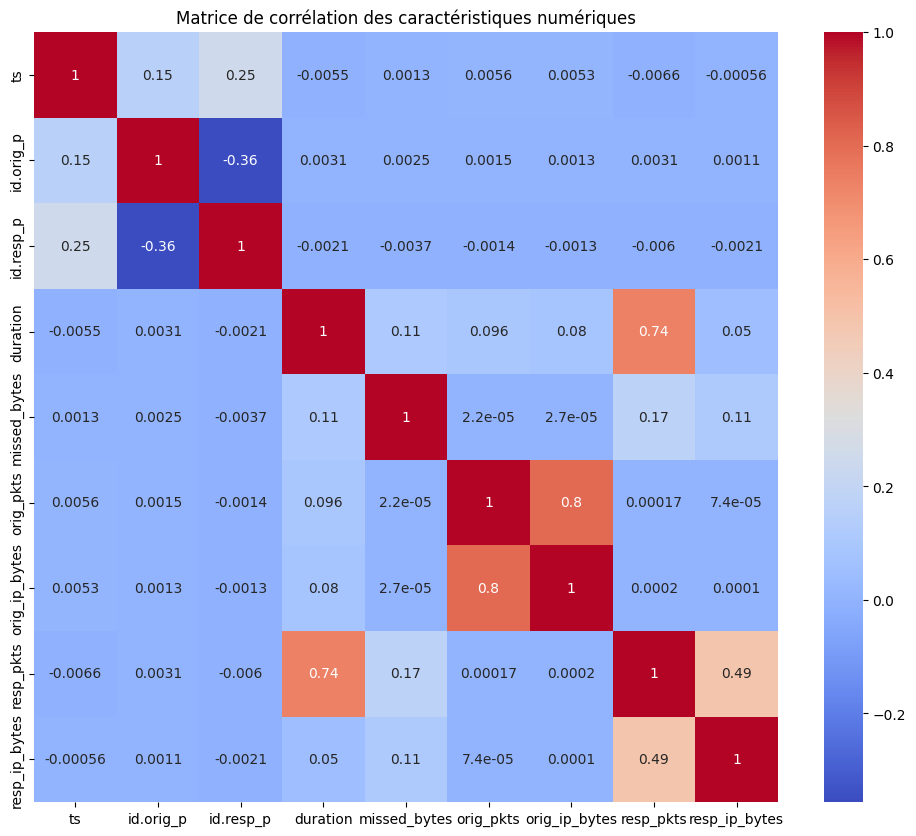

In [31]:
# Analyse de corrélation
print("\n=== Analyse de corrélation ===")
numeric_data = df.select_dtypes(include=["float64", "int64","float32", "int32"])
corr_matrix = numeric_data.corr()

print("\nMatrice de corrélation:")
print(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des caractéristiques numériques")
plt.show()

In [32]:
# Identification des fortes corrélations
threshold = 0.75
strong_correlations = []
columns = corr_matrix.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            strong_correlations.append((columns[i], columns[j], corr_value))

strong_correlations_df = pd.DataFrame(
    strong_correlations,
    columns=["Caractéristique 1", "Caractéristique 2", "Corrélation"],
)

print("\nForte corrélations (seuil = 0.75):")
print(strong_correlations_df)


Forte corrélations (seuil = 0.75):
  Caractéristique 1 Caractéristique 2  Corrélation
0         orig_pkts     orig_ip_bytes     0.804117
